Imports

In [9]:
import numpy as np
import pandas as pd

from matplotlib import pyplot

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD

Load Dataset

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Visualize Data

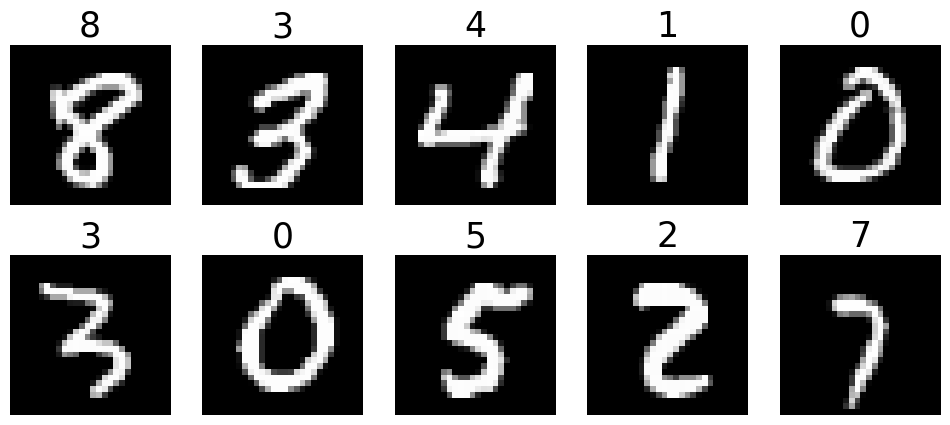

In [12]:
fig , axes  = pyplot.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
pyplot.show()

Prepare Data

In [13]:
# To give us values between 0 and 1, best for the CNN to learn
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [14]:
print(y_train.shape)
y_train = to_categorical(y_train, num_classes = 10)
print(y_train.shape)

(60000,)
(60000, 10)


Build Model

In [15]:
model = Sequential()  # A FNN, one input, one output

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))  
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

criterion = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer = criterion, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
# What if I add fourier features
 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,003,626 (3.83 MB)

 Trainable params: 1,003,626 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [16]:
print(X_train.shape)
print(y_train.shape)
model.fit(X_train, y_train, epochs = 10, validation_split=0.1)

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8544 - loss: 0.4461 - val_accuracy: 0.9805 - val_loss: 0.0669
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0580 - val_accuracy: 0.9858 - val_loss: 0.0521
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0347 - val_accuracy: 0.9872 - val_loss: 0.0482
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9898 - val_loss: 0.0468
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0154 - val_accuracy: 0.9890 - val_loss: 0.0434
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9880 - val_loss: 0.0450
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9890 - val_loss: 0.0469
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc

Validation

In [17]:
y_test = to_categorical(y_test, num_classes=10)
print(X_test.shape)
print(y_test.shape)
model.evaluate(X_test, y_test)
#0.9873

(10000, 28, 28, 1)
(10000, 10)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9873 - loss: 0.0504


[0.040532082319259644, 0.989300012588501]

In [18]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


View Results

In [19]:
predicted_labels = np.argmax(y_pred, axis=1)